Load some utils function + annotations first

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
from utils import load_image_annotations, display_image_with_keypoints

In [3]:
annotations = json.load(open("/root/data/gtsf_2.0/registration_test/gtsf_in_air_labels.json"))

load reference image

In [4]:
static_image, static_mask, static_keypoints, static_kp_map = load_image_annotations(annotations[0], new_shape=(800, 600))

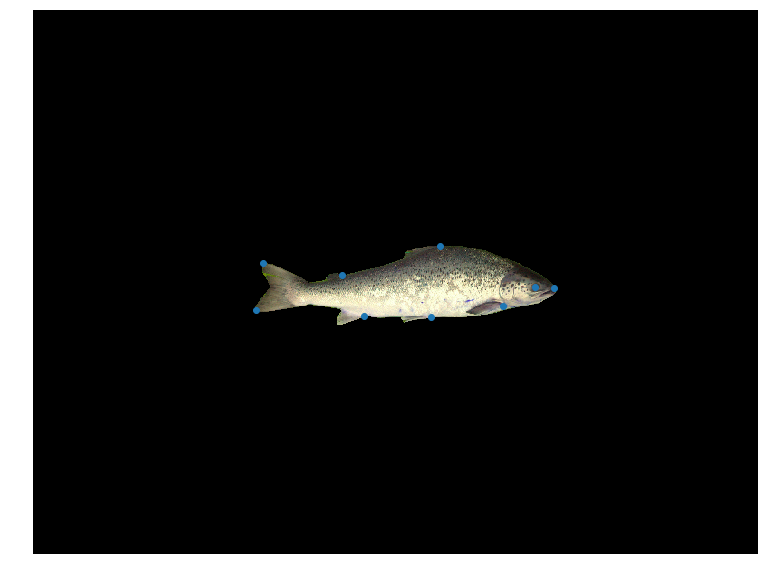

In [5]:
display_image_with_keypoints(static_image, static_keypoints)

load one moving image

In [149]:
moving_image, moving_mask, moving_keypoints, moving_kp_map = load_image_annotations(annotations[5], new_shape=(800, 600))

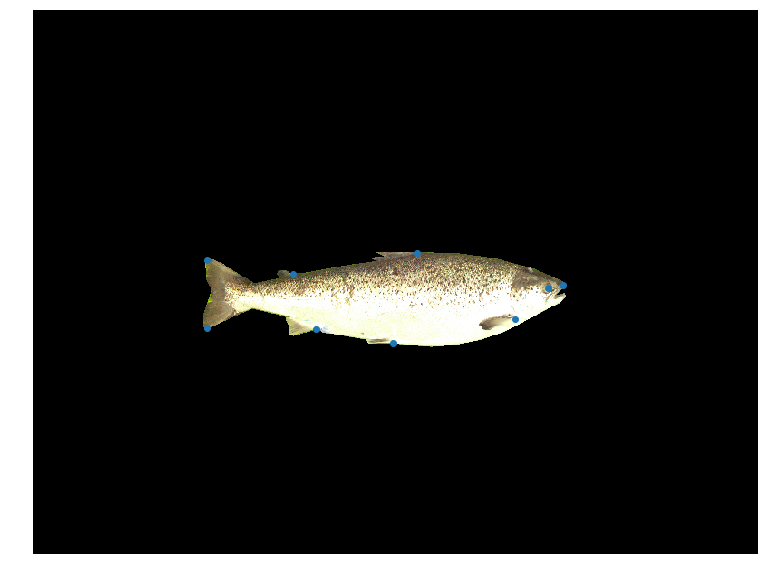

In [119]:
display_image_with_keypoints(moving_image, moving_keypoints)

some dipy stuff

In [64]:
from copy import copy

from dipy.viz import regtools

from utils import translate_moving

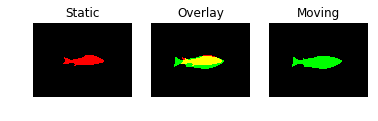

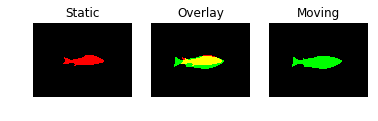

In [65]:
regtools.overlay_images(static_mask, moving_mask, 'Static', 'Overlay', 'Moving', 'input_images.png')

In [66]:
moving_translated, translation_vector = translate_moving(static_mask, moving_mask)

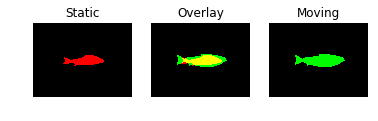

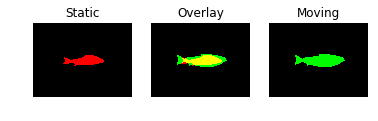

In [67]:
regtools.overlay_images(static_mask, moving_translated, 'Static', 'Overlay', 'Moving', 'input_images.png')

Perform the registration

In [68]:
from utils import register

In [69]:
mapping = register(static_mask, moving_translated)

Creating scale space from the moving image. Levels: 5. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 5. Sigma factor: 0.200000.
Optimizing level 4
Optimizing level 3
Optimizing level 2
Optimizing level 1
Optimizing level 0


(array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
           0.      ],
        [  0.      , 126.999985, 126.99998 , ..., 127.      , 127.      ,
         127.      ],
        [  0.      , 126.999985, 127.      , ..., 127.      , 127.      ,
         127.      ],
        ...,
        [  0.      , 127.      , 127.      , ..., 127.      , 127.      ,
         127.      ],
        [  0.      , 127.      , 127.      , ..., 127.      , 127.      ,
         127.      ],
        [  0.      , 127.      , 127.      , ..., 127.      , 127.      ,
         127.      ]], dtype=float32),
 array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 127.00001, 127.     , ..., 127.     , 127.     ,
         127.     ],
        [  0.     , 127.     , 126.99999, ..., 127.     , 127.     ,
         127.     ],
        ...,
        [  0.     , 127.     , 127.     , ..., 127.     , 127.     ,
         127.     ],
        [  0.     , 1

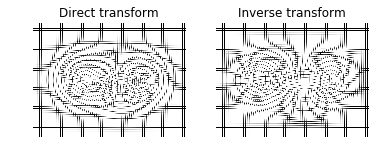

In [70]:
regtools.plot_2d_diffeomorphic_map(mapping, 10, 'diffeomorphic_map.png')

Display forward registration

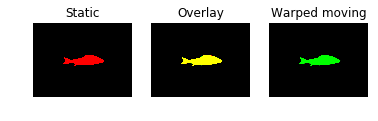

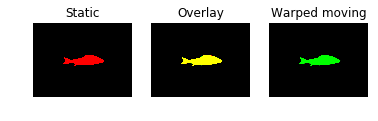

In [71]:
warped_moving = mapping.transform(moving_translated, 'linear')
regtools.overlay_images(static_mask, warped_moving, 'Static','Overlay','Warped moving',
   'direct_warp_result.png')

Display backward registration

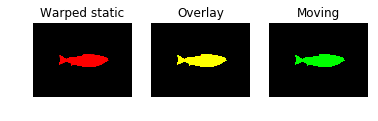

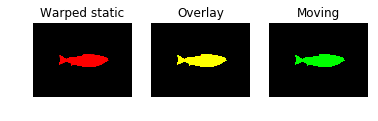

In [72]:
warped_static = mapping.transform_inverse(static_mask, 'linear')
regtools.overlay_images(warped_static, moving_translated,'Warped static','Overlay','Moving',
   'inverse_warp_result.png')

Warping keypoints

In [73]:
from utils import display_warped_keypoints

In [74]:
warped_kp_map = mapping.transform_inverse(static_kp_map, "linear")

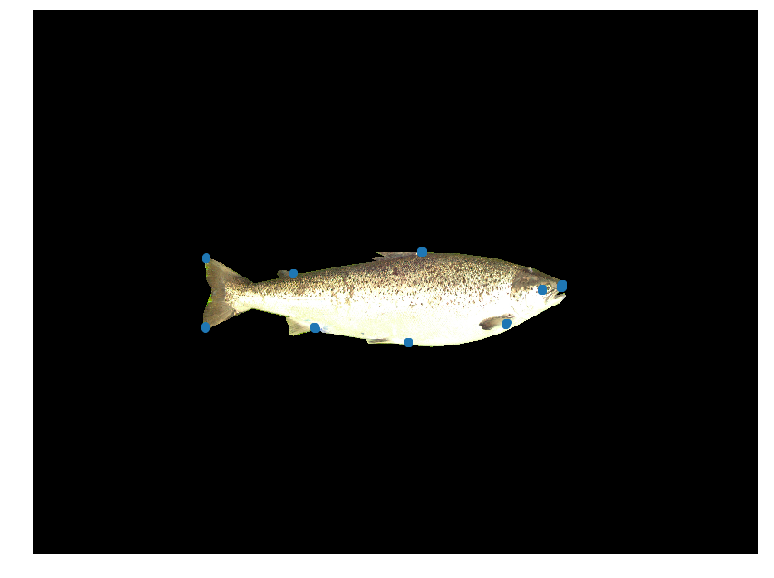

In [75]:
display_warped_keypoints(moving_image, warped_kp_map, translation_vector)

In [86]:
from utils import display_pairs_with_keypoints

[[267 267 268 268 274 274 275 275 290 290 291 291 302 302 303 303 305 305
  306 306 339 339 340 340 349 349 350 350 350 350 351 351 366 366 367 367]
 [422 423 422 423 191 192 191 192 285 286 285 286 583 584 583 584 567 568
  567 568 530 531 530 531 190 191 190 191 311 312 311 312 396 397 396 397]]


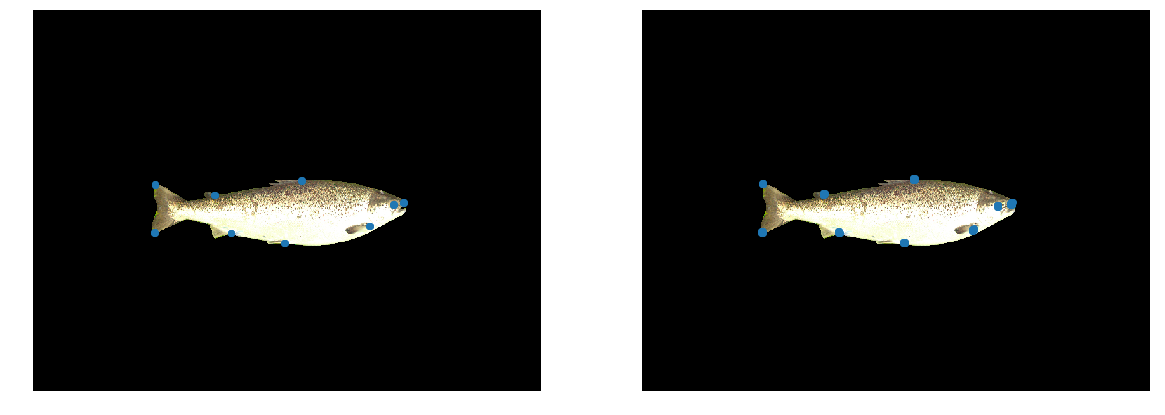

In [87]:
display_pairs_with_keypoints(moving_image, moving_kp_map, warped_kp_map, translation_vector)

# TEST

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.optimize import linear_sum_assignment

In [170]:
from utils import calculate_errors

In [171]:
calculate_errors(moving_keypoints, warped_kp_map, translation_vector)

Keypoint top caudal: prediction [192 275] groundtruth [190 272]
Manhattan distance: 5
Keypoint eye: prediction [568 306] groundtruth [560 307]
Manhattan distance: 9
Keypoint anal: prediction [312 351] groundtruth [310 349]
Manhattan distance: 4
Keypoint adipose: prediction [286 291] groundtruth [286 289]
Manhattan distance: 2
Keypoint dorsal: prediction [423 268] groundtruth [428 265]
Manhattan distance: 8
Keypoint pectoral: prediction [531 340] groundtruth [521 345]
Manhattan distance: 15
Keypoint top mouth: prediction [584 303] groundtruth [582 303]
Manhattan distance: 2
Keypoint bottom caudal: prediction [191 350] groundtruth [188 349]
Manhattan distance: 4
Keypoint pelvic: prediction [397 367] groundtruth [413 365]
Manhattan distance: 18


In [101]:
distances = pairwise_distances(moving_keypoints.transpose())

In [126]:
keypoints_mv = []
same = []
for i in range(distances.shape[0]):
    if i in list(same):
        continue
    same = np.where(distances[i, :] < 10)[0]
    x = int(np.mean([moving_keypoints[0, k] for k in same]))
    y = int(np.mean([moving_keypoints[1, k] for k in same]))
    keypoints_mv.append((x,y))

In [127]:
distances = pairwise_distances(warped_keypoints.transpose())

In [134]:
keypoints_wrp = []
same = []
for i in range(distances.shape[0]):
    if i in list(same):
        continue
    same = np.where(distances[i, :] < 10)[0]
    print(same)
    x = int(np.mean([warped_keypoints[0, k] for k in same]))
    y = int(np.mean([warped_keypoints[1, k] for k in same]))
    keypoints_wrp.append((x,y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]
[26 27 28 29 30 31 32 33 34 35 36 37]
[38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 60 61 62]
[57 58 59 63 64 65 66 67 68 69 70 71]
[38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 60 61 62]
[57 58 59 63 64 65 66 67 68 69 70 71]
[72 73 74 75 76 77 78 79 80 81 83 84 85]
[ 82  86  87  88  92  93  94  98  99 100 105]
[72 73 74 75 76 77 78 79 80 81 83 84 85]
[ 82  86  87  88  92  93  94  98  99 100 105]
[ 89  90  91  95  96  97 101 102 103 104 106 107 108]
[ 82  86  87  88  92  93  94  98  99 100 105]
[ 89  90  91  95  96  97 101 102 103 104 106 107 108]
[ 82  86  87  88  92  93  94  98  99 100 105]
[ 89  90  91  95  96  97 101 102 103 104 106 107 108]
[ 82  86  87  88  92  93  94  98  99 100 105]
[ 89  90  91  95  96  97 101 102 103 104 106 107 108]
[109 110 111 112 113 114 115 116 117 118 119 120 121]


In [129]:
keypoints_mv

[(267, 422),
 (274, 191),
 (290, 285),
 (302, 583),
 (305, 567),
 (339, 530),
 (349, 190),
 (350, 311),
 (366, 396)]

In [130]:
keypoints_wrp

[(253, 452),
 (260, 214),
 (277, 310),
 (291, 606),
 (295, 585),
 (291, 606),
 (295, 585),
 (333, 545),
 (337, 213),
 (333, 545),
 (337, 213),
 (337, 334),
 (337, 213),
 (337, 334),
 (337, 213),
 (337, 334),
 (337, 213),
 (337, 334),
 (353, 437)]